### train.csv - 학습용 데이터

- 단지코드
- 총세대수
- 임대건물구분
- 지역
- 공급유형
- 전용면적
- 전용면적별세대수
- 공가수
- 신분
- 임대료보증금
- 임대료
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수
- 등록차량수
﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿

### test.csv - 테스트 데이터

- 단지코드
- 총세대수
- 임대건물구분
- 지역
- 공급유형
- 전용면적
- 전용면적별세대수
- 공가수
- 신분
- 임대료보증금
- 임대료
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수


### age_gender_info.csv - 지역 임대주택 나이별, 성별 인구 분포

지역
10대미만(여자)
10대미만(남자)
20대(여자)
20대(남자)
30대(여자)
30대(남자)
40대(여자)
40대(남자)
50대(여자)
50대(남자)
60대(여자)
60대(남자)
70대(여자)
70대(남자)
80대(여자)
80대(남자)
90대(여자)
90대(남자)
100대(여자)
100대(남자)


### sample_submission.csv - 제출 양식

- code : 단지 코드
- num : 등록차량수


## 패키지

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler



# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json




# 저장
import pickle

from tqdm import tqdm

## 데이터

In [2]:
new_train = pd.read_csv('data/train_gender.csv', encoding='cp949')
new_test = pd.read_csv('data/test_gender.csv', encoding='cp949')
submission = pd.read_csv('data/sample_submission.csv')
new_train = new_train.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
new_test = new_test.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
display(new_train)
display(new_test)

단지코드    총세대수  임대건물구분    지역  공급유형  전용면적  전용면적별세대수   신분       임대보증금  \
0    C2483   900.0     0.0   0.0   0.0  35.0     134.0  0.0  15667000.0   
1    C2371   474.0     0.0   0.0   0.0  35.0      42.0  0.0   9731000.0   
2    C2097   998.0     0.0   0.0   0.0  30.0     184.0  0.0  13158000.0   
3    C1368   896.0     0.0   0.0   0.0  35.0     176.0  0.0  13731000.0   
4    C1057   521.0     0.0   0.0   0.0  35.0     134.0  0.0  13731000.0   
..     ...     ...     ...   ...   ...   ...       ...  ...         ...   
418  C1652   890.0     0.0  14.0   2.0  15.0     188.0  3.0  40400000.0   
419  C2051  1164.0     0.0  15.0   1.0  55.0       2.0  0.0  39000000.0   
420  C2612  1684.0     0.0  15.0   0.0  25.0     628.0  0.0   9800000.0   
421  C1802  1438.0     0.0  15.0   1.0  55.0      32.0  0.0  39000000.0   
422  C2086  1080.0     0.0  15.0   1.0  55.0     456.0  0.0  39000000.0   

          임대료  ...   60대(남자)   70대(여자)   70대(남자)   80대(여자)   80대(남자)  \
0    103680.0  ...  0.063889  0.047717  0.030172  0.029361  0.011211   
1     72080.0  ...  0.063889  0.047717  0.030172  0.029361  0.011211   
2     90020.0  ...  0.063889  0.047717  0.030172  0.029361  0.011211   
3    117330.0  ...  0.063889  0.047717  0.030172  0.029361  0.011211   
4    117330.0  ...  0.063889  0.047717  0.030172  0.029361  0.011211   
..        ...  ...       ...       ...       ...       ...       ...   
418  134660.0  ...  0.078939  0.097543  0.061050  0.047853  0.023463   
419  440000.0  ...  0.051163  0.026056  0.026223  0.013893  0.007086   
420  154000.0  ...  0.051163  0.026056  0.026223  0.013893  0.007086   
421  450000.0  ...  0.051163  0.026056  0.026223  0.013893  0.007086   
422  460000.0  ...  0.051163  0.026056  0.026223  0.013893  0.007086   

      90대(여자)   90대(남자)  100대(여자)  100대(남자)   등록차량수  
0    0.005578  0.001553  0.000234  0.000014  1015.0  
1    0.005578  0.001553  0.000234  0.000014   451.0  
2    0.005578  0.001553  0.000234  0.000014   995.0  
3    0.005578  0.001553  0.000234  0.000014   861.0  
4    0.005578  0.001553  0.000234  0.000014   521.0  
..        ...       ...       ...       ...     ...  
418  0.011344  0.003326  0.000532  0.000152   509.0  
419  0.003459  0.001004  0.000279  0.000112   780.0  
420  0.003459  0.001004  0.000279  0.000112  1832.0  
421  0.003459  0.001004  0.000279  0.000112  1983.0  
422  0.003459  0.001004  0.000279  0.000112  1524.0  

[423 rows x 51 columns]

단지코드    총세대수  임대건물구분    지역  공급유형  전용면적  전용면적별세대수   신분       임대보증금  \
0    C1072   754.0     0.0   3.0   0.0  35.0     116.0  2.0  22830000.0   
1    C1128  1354.0     0.0   3.0   0.0  35.0     368.0  2.0  22830000.0   
2    C1332  1297.0     0.0   3.0   0.0  35.0     282.0  2.0  28598000.0   
3    C1563  1974.0     0.0   3.0   0.0  35.0     214.0  0.0  30040000.0   
4    C1721   663.0     0.0   3.0   0.0  35.0     155.0  0.0  26435000.0   
..     ...     ...     ...   ...   ...   ...       ...  ...         ...   
145  C1633   178.0     0.0  13.0   0.0  25.0      88.0  0.0  10305000.0   
146  C2451   395.0     0.0  13.0   1.0  55.0      23.0  0.0  50000000.0   
147  C2292   906.0     0.0  15.0   0.0  20.0     336.0  2.0   8738000.0   
148  C2551   674.0     0.0  15.0   0.0  20.0     160.0  2.0   8768000.0   
149  C1229   453.0     0.0  15.0   2.0  15.0     262.0  3.0  16228000.0   

          임대료  ...   60대(여자)   60대(남자)   70대(여자)   70대(남자)   80대(여자)  \
0    189840.0  ...  0.074237  0.058419  0.042422  0.032725  0.025136   
1    189840.0  ...  0.074237  0.058419  0.042422  0.032725  0.025136   
2    203050.0  ...  0.074237  0.058419  0.042422  0.032725  0.025136   
3    206380.0  ...  0.074237  0.058419  0.042422  0.032725  0.025136   
4    180230.0  ...  0.074237  0.058419  0.042422  0.032725  0.025136   
..        ...  ...       ...       ...       ...       ...       ...   
145  146780.0  ...  0.094511  0.073133  0.055914  0.036572  0.031887   
146  450000.0  ...  0.094511  0.073133  0.055914  0.036572  0.031887   
147  131580.0  ...  0.065279  0.051163  0.026056  0.026223  0.013893   
148  123360.0  ...  0.065279  0.051163  0.026056  0.026223  0.013893   
149   64910.0  ...  0.065279  0.051163  0.026056  0.026223  0.013893   

      80대(남자)   90대(여자)   90대(남자)  100대(여자)  100대(남자)  
0    0.012354  0.005390  0.001707  0.000290  0.000067  
1    0.012354  0.005390  0.001707  0.000290  0.000067  
2    0.012354  0.005390  0.001707  0.000290  0.000067  
3    0.012354  0.005390  0.001707  0.000290  0.000067  
4    0.012354  0.005390  0.001707  0.000290  0.000067  
..        ...       ...       ...       ...       ...  
145  0.012556  0.005364  0.001259  0.000219  0.000000  
146  0.012556  0.005364  0.001259  0.000219  0.000000  
147  0.007086  0.003459  0.001004  0.000279  0.000112  
148  0.007086  0.003459  0.001004  0.000279  0.000112  
149  0.007086  0.003459  0.001004  0.000279  0.000112  

[150 rows x 50 columns]

In [3]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   단지코드       423 non-null    object 
 1   총세대수       423 non-null    float64
 2   임대건물구분     423 non-null    float64
 3   지역         423 non-null    float64
 4   공급유형       423 non-null    float64
 5   전용면적       423 non-null    float64
 6   전용면적별세대수   423 non-null    float64
 7   신분         423 non-null    float64
 8   임대보증금      419 non-null    float64
 9   임대료        417 non-null    float64
 10  지하철        403 non-null    float64
 11  버스         422 non-null    float64
 12  단지내주차면수    423 non-null    float64
 13  면적_35.0    423 non-null    float64
 14  면적_50.0    423 non-null    float64
 15  면적_55.0    423 non-null    float64
 16  면적_45.0    423 non-null    float64
 17  면적_30.0    423 non-null    float64
 18  면적_40.0    423 non-null    float64
 19  면적_25.0    423 non-null    float64
 20  면적_70.0   

In [4]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 50 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   단지코드       150 non-null    object 
 1   총세대수       150 non-null    float64
 2   임대건물구분     150 non-null    float64
 3   지역         150 non-null    float64
 4   공급유형       150 non-null    float64
 5   전용면적       150 non-null    float64
 6   전용면적별세대수   150 non-null    float64
 7   신분         150 non-null    float64
 8   임대보증금      149 non-null    float64
 9   임대료        149 non-null    float64
 10  지하철        145 non-null    float64
 11  버스         150 non-null    float64
 12  단지내주차면수    150 non-null    float64
 13  면적_35.0    150 non-null    float64
 14  면적_50.0    150 non-null    float64
 15  면적_55.0    150 non-null    float64
 16  면적_45.0    150 non-null    float64
 17  면적_30.0    150 non-null    float64
 18  면적_40.0    150 non-null    float64
 19  면적_25.0    150 non-null    float64
 20  면적_70.0   

## 결측치 처리

In [5]:
new_train = new_train.fillna(-1)
new_test = new_test.fillna(-1)

In [6]:
new_train

단지코드    총세대수  임대건물구분    지역  공급유형  전용면적  전용면적별세대수   신분       임대보증금  \
0    C2483   900.0     0.0   0.0   0.0  35.0     134.0  0.0  15667000.0   
1    C2371   474.0     0.0   0.0   0.0  35.0      42.0  0.0   9731000.0   
2    C2097   998.0     0.0   0.0   0.0  30.0     184.0  0.0  13158000.0   
3    C1368   896.0     0.0   0.0   0.0  35.0     176.0  0.0  13731000.0   
4    C1057   521.0     0.0   0.0   0.0  35.0     134.0  0.0  13731000.0   
..     ...     ...     ...   ...   ...   ...       ...  ...         ...   
418  C1652   890.0     0.0  14.0   2.0  15.0     188.0  3.0  40400000.0   
419  C2051  1164.0     0.0  15.0   1.0  55.0       2.0  0.0  39000000.0   
420  C2612  1684.0     0.0  15.0   0.0  25.0     628.0  0.0   9800000.0   
421  C1802  1438.0     0.0  15.0   1.0  55.0      32.0  0.0  39000000.0   
422  C2086  1080.0     0.0  15.0   1.0  55.0     456.0  0.0  39000000.0   

          임대료  ...   60대(남자)   70대(여자)   70대(남자)   80대(여자)   80대(남자)  \
0    103680.0  ...  0.063889  0.047717  0.030172  0.029361  0.011211   
1     72080.0  ...  0.063889  0.047717  0.030172  0.029361  0.011211   
2     90020.0  ...  0.063889  0.047717  0.030172  0.029361  0.011211   
3    117330.0  ...  0.063889  0.047717  0.030172  0.029361  0.011211   
4    117330.0  ...  0.063889  0.047717  0.030172  0.029361  0.011211   
..        ...  ...       ...       ...       ...       ...       ...   
418  134660.0  ...  0.078939  0.097543  0.061050  0.047853  0.023463   
419  440000.0  ...  0.051163  0.026056  0.026223  0.013893  0.007086   
420  154000.0  ...  0.051163  0.026056  0.026223  0.013893  0.007086   
421  450000.0  ...  0.051163  0.026056  0.026223  0.013893  0.007086   
422  460000.0  ...  0.051163  0.026056  0.026223  0.013893  0.007086   

      90대(여자)   90대(남자)  100대(여자)  100대(남자)   등록차량수  
0    0.005578  0.001553  0.000234  0.000014  1015.0  
1    0.005578  0.001553  0.000234  0.000014   451.0  
2    0.005578  0.001553  0.000234  0.000014   995.0  
3    0.005578  0.001553  0.000234  0.000014   861.0  
4    0.005578  0.001553  0.000234  0.000014   521.0  
..        ...       ...       ...       ...     ...  
418  0.011344  0.003326  0.000532  0.000152   509.0  
419  0.003459  0.001004  0.000279  0.000112   780.0  
420  0.003459  0.001004  0.000279  0.000112  1832.0  
421  0.003459  0.001004  0.000279  0.000112  1983.0  
422  0.003459  0.001004  0.000279  0.000112  1524.0  

[423 rows x 51 columns]

## 기본모델 사용

In [7]:
X = new_train.iloc[:, 1:-1]
y= new_train.iloc[:,-1]
x_test = new_test.iloc[:,1:]

In [8]:
# 표준화 작업
scaler1 = MinMaxScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[0.34382376, 0.        , 0.        , ..., 0.27039684, 0.33482445,
        0.02961396],
       [0.17623918, 0.        , 0.        , ..., 0.27039684, 0.33482445,
        0.02961396],
       [0.38237608, 0.        , 0.        , ..., 0.27039684, 0.33482445,
        0.02961396],
       ...,
       [0.65224233, 0.        , 1.        , ..., 0.04481765, 0.43617849,
        0.24051697],
       [0.55546814, 0.        , 1.        , ..., 0.04481765, 0.43617849,
        0.24051697],
       [0.41463415, 0.        , 1.        , ..., 0.04481765, 0.43617849,
        0.24051697]])

In [9]:
# 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 이전에 만든 예제들이 X, y로 사용하고 있기 때문에 변수에 담아준다.
X = X_train
y = y_train

In [10]:
params = {
    # 이웃의 개수
    'n_neighbors' : list(range(1, 11))
}

model1 = KNeighborsRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring='r2', cv=kfold)
grid_clf1.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf1.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf1.best_score_}')

최적의 하이퍼 파라미터 : {'n_neighbors': 5}
최적의 모델 평균성능 : 0.47446457674053527


In [11]:
# LogisticRegression 
# penalty : 규제의 종류(l1, l2, elasticnet, none)
# C : 규제의 강도 
params = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring='r2', cv=kfold)
grid_clf2.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf2.best_score_}')

최적의 하이퍼 파라미터 : {'C': 1000, 'penalty': 'l2'}
최적의 모델 평균 성능 : 0.40018431764215456


In [12]:
# Ridge
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model3 = Ridge()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring='r2', cv=kfold)
grid_clf3.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf3.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf3.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 1}
최적의 모델 평균성능 : 0.7519842898761245


In [13]:
# Lasso
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model4 = Lasso()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring='r2', cv=kfold)
grid_clf4.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf4.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf4.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 1}
최적의 모델 평균성능 : 0.7493189700053893


In [14]:
# ElasticNet
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model5 = ElasticNet()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf5 = GridSearchCV(model5, param_grid=params, scoring='r2', cv=kfold)
grid_clf5.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf5.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf5.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 0.01}
최적의 모델 평균성능 : 0.750499385449899


In [15]:
# SVM(SVR)
# C : 규제의 강도 
params = {
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model6 = SVR()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf6 = GridSearchCV(model6, param_grid=params, scoring='r2', cv=kfold)
grid_clf6.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf6.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf6.best_score_}')

최적의 하이퍼 파라미터 : {'C': 1000}
최적의 모델 평균성능 : 0.7124682232782772


In [16]:
# max_depth : 최대 질문 생성 깊이
params = {
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model7 = DecisionTreeRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf7 = GridSearchCV(model7, param_grid=params, scoring='r2', cv=kfold)
grid_clf7.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf7.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf7.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 4}
최적의 모델 평균성능 : 0.6121420890476912


In [17]:
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model8 = RandomForestRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf8 = GridSearchCV(model8, param_grid=params, scoring='r2', cv=kfold)
grid_clf8.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf8.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf8.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 9, 'n_estimators': 100}
최적의 모델 평균성능 : 0.7310268576852226


In [18]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
}

model9 = AdaBoostRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf9 = GridSearchCV(model9, param_grid=params, scoring='r2', cv=kfold)
grid_clf9.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf9.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf9.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 100}
최적의 모델 평균성능 : 0.6847196794273326


In [19]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model10 = GradientBoostingRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf10 = GridSearchCV(model10, param_grid=params, scoring='r2', cv=kfold)
grid_clf10.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf10.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf10.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}
최적의 모델 평균성능 : 0.7320872764416375


In [20]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model11 = LGBMRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf11 = GridSearchCV(model11, param_grid=params, scoring='r2', cv=kfold)
grid_clf11.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf11.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf11.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
최적의 모델 평균성능 : 0.7208655149580969


In [21]:
# booster : 사용할 알고리즘 종류
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'booster' : ['gbtree', 'gblinear'],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model12 = XGBRegressor(silent=True, verbosity=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf12 = GridSearchCV(model12, param_grid=params, scoring='r2', cv=kfold)
grid_clf12.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf12.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf12.best_score_}')

최적의 하이퍼 파라미터 : {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
최적의 모델 평균성능 : 0.7313983742669562


In [22]:
# 시각화를 위한 데이터프레임을 생성한다.

score_list = [
    grid_clf1.best_score_, grid_clf2.best_score_, grid_clf3.best_score_,
    grid_clf4.best_score_, grid_clf5.best_score_, grid_clf6.best_score_,
    grid_clf7.best_score_, grid_clf8.best_score_, grid_clf9.best_score_,
    grid_clf10.best_score_,grid_clf11.best_score_, grid_clf12.best_score_,    
]

results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'Ridge','Lasso','ElasticNet' , 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost','GradientBoost','LGBM','XGBoost'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

Model     Score
0                Ridge  0.751984
1           ElasticNet  0.750499
2                Lasso  0.749319
3        GradientBoost  0.732087
4              XGBoost  0.731398
5         RandomForest  0.731027
6                 LGBM  0.720866
7                  SVC  0.712468
8             AdaBoost  0.684720
9         DecisionTree  0.612142
10                 KNN  0.474465
11  LogisticRegression  0.400184

## voting

In [23]:
# # SVC 에서 확률을 확인할 수 있도록 설정한다.
# grid_clf3.best_estimator_.probability = True

# model_list = (
#     ('model1', grid_clf1.best_estimator_), 
#     ('model2', grid_clf2.best_estimator_),
#     ('model3', grid_clf3.best_estimator_),
#     ('model4', grid_clf4.best_estimator_),
#     ('model5', grid_clf5.best_estimator_),
#     ('model6', grid_clf6.best_estimator_),
#     ('model7', grid_clf7.best_estimator_),
#     ('model8', grid_clf8.best_estimator_),
#     ('model9', grid_clf9.best_estimator_),
#      ('model10', grid_clf10.best_estimator_),
#     ('model11', grid_clf11.best_estimator_),
#     ('model12', grid_clf12.best_estimator_)
# )

# model13 = VotingRegressor(estimators=model_list,voting='hard')
# model14 = VotingRegressor(estimators=model_list,voting='soft')

In [24]:
# 최적의 모델을 생성한다.
best_model1 = grid_clf1.best_estimator_
best_model2 = LinearRegression()
best_model3 = grid_clf3.best_estimator_
best_model4 = grid_clf4.best_estimator_
best_model5 = grid_clf5.best_estimator_
best_model6 = grid_clf6.best_estimator_
best_model7 = grid_clf7.best_estimator_
best_model8 = grid_clf8.best_estimator_
best_model9 = grid_clf9.best_estimator_
best_model10 = grid_clf10.best_estimator_
best_model11 = grid_clf11.best_estimator_
best_model12 = grid_clf12.best_estimator_

# 사용할 알고리즘들..
model_list = [
    ('model1', best_model1), ('model2', best_model2), ('model3', best_model3),
    ('model4', best_model4), ('model5', best_model5), ('model6', best_model6),
    ('model7', best_model7), ('model8', best_model8), ('model9', best_model9),
    ('model10', best_model10), ('model11', best_model11),
    ('model12', best_model12)
]

best_model13 = VotingRegressor(estimators=model_list)

In [25]:
# 교차 검증을 수행한다.
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(best_model1, X, y, scoring='r2', cv=kfold)
r2 = cross_val_score(best_model2, X, y, scoring='r2', cv=kfold)
r3 = cross_val_score(best_model3, X, y, scoring='r2', cv=kfold)
r4 = cross_val_score(best_model4, X, y, scoring='r2', cv=kfold)
r5 = cross_val_score(best_model5, X, y, scoring='r2', cv=kfold)
r6 = cross_val_score(best_model6, X, y, scoring='r2', cv=kfold)
r7 = cross_val_score(best_model7, X, y, scoring='r2', cv=kfold)
r8 = cross_val_score(best_model8, X, y, scoring='r2', cv=kfold)
r9 = cross_val_score(best_model9, X, y, scoring='r2', cv=kfold)
r10 = cross_val_score(best_model10, X, y, scoring='r2', cv=kfold)
r11 = cross_val_score(best_model11, X, y, scoring='r2', cv=kfold)
r12 = cross_val_score(best_model12, X, y, scoring='r2', cv=kfold)
r13 = cross_val_score(best_model13, X, y, scoring='r2', cv=kfold)

In [26]:
# 사용할 알고리즘을 리스트에 담는다.
check_list = [
    best_model1, best_model2, best_model3, best_model4, best_model5, best_model6,
    best_model7, best_model8, best_model9, best_model10, best_model11, best_model12, best_model13
]
# 교차 검증 평균을 담을 리스트
score_list = []

In [27]:
# 시각화를 위한 데이터프레임을 생성한다.

score_list = [
    r1.mean(), r2.mean(), r3.mean(),
    r4.mean(), r5.mean(), r6.mean(),
   r7.mean(), r8.mean(), r9.mean(),
    r10.mean(), r11.mean(),r12.mean(),r13.mean()
]

results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'Ridge', 'Lasso','ElasticNet','SVR', 'DecisionTree',
               'RandomForest', 'AdaBoost', 'GradientBoost', 'LGBMRegressor',
                'XGBoost','Voting'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

Model     Score
0               Voting  0.755312
1                Ridge  0.751984
2           ElasticNet  0.750499
3                Lasso  0.749319
4        GradientBoost  0.736227
5              XGBoost  0.731398
6         RandomForest  0.724380
7        LGBMRegressor  0.720866
8                  SVR  0.712468
9             AdaBoost  0.684984
10        DecisionTree  0.616492
11  LogisticRegression  0.594358
12                 KNN  0.474465

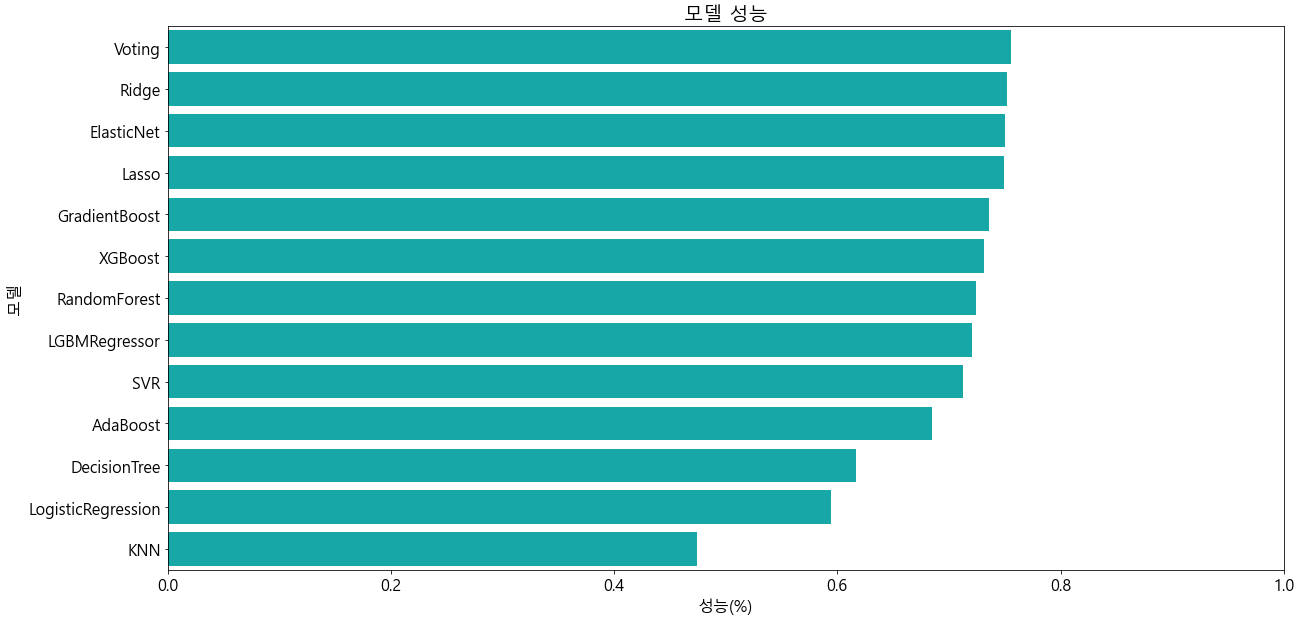

In [28]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()

In [29]:
# print(r1.mean())
# print(r2.mean())
# print(r3.mean())
# print(r4.mean())
# print(r5.mean())
# print(r6.mean())
# print(r7.mean())
# print(r8.mean())
# print(r9.mean())
# print(r10.mean())
# print(r11.mean())
# print(r12.mean())
# print(r13.mean())

### 학습 데이터를 이용해 평가를 실시한다.

In [30]:
# 전체 데이터를 학습시킨다.
best_model1.fit(X, y)
best_model2.fit(X, y)
best_model3.fit(X, y)
best_model4.fit(X, y)
best_model5.fit(X, y)
best_model6.fit(X, y)
best_model7.fit(X, y)
best_model8.fit(X, y)
best_model9.fit(X, y)
best_model10.fit(X, y)
best_model11.fit(X, y)
best_model12.fit(X, y)
best_model13.fit(X, y)

VotingRegressor(estimators=[('model1', KNeighborsRegressor()),
                            ('model2', LinearRegression()),
                            ('model3', Ridge(alpha=1)),
                            ('model4', Lasso(alpha=1)),
                            ('model5', ElasticNet(alpha=0.01)),
                            ('model6', SVR(C=1000)),
                            ('model7', DecisionTreeRegressor(max_depth=4)),
                            ('model8', RandomForestRegressor(max_depth=9)),
                            ('model9',
                             AdaBoostRegressor(learning_rate=0.1,
                                               n_estimators...
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                           

In [31]:
# 학습 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X)
y_pred2 = best_model2.predict(X)
y_pred3 = best_model3.predict(X)
y_pred4 = best_model4.predict(X)
y_pred5 = best_model5.predict(X)
y_pred6 = best_model6.predict(X)
y_pred7 = best_model7.predict(X)
y_pred8 = best_model8.predict(X)
y_pred9 = best_model9.predict(X)
y_pred10 = best_model10.predict(X)
y_pred11 = best_model11.predict(X)
y_pred12 = best_model12.predict(X)
y_pred13 = best_model13.predict(X)

In [32]:
# 그래프를 그리기 위해 y 값 인덱스를 다시 설정한다.
y.reset_index(drop=True, inplace=True)

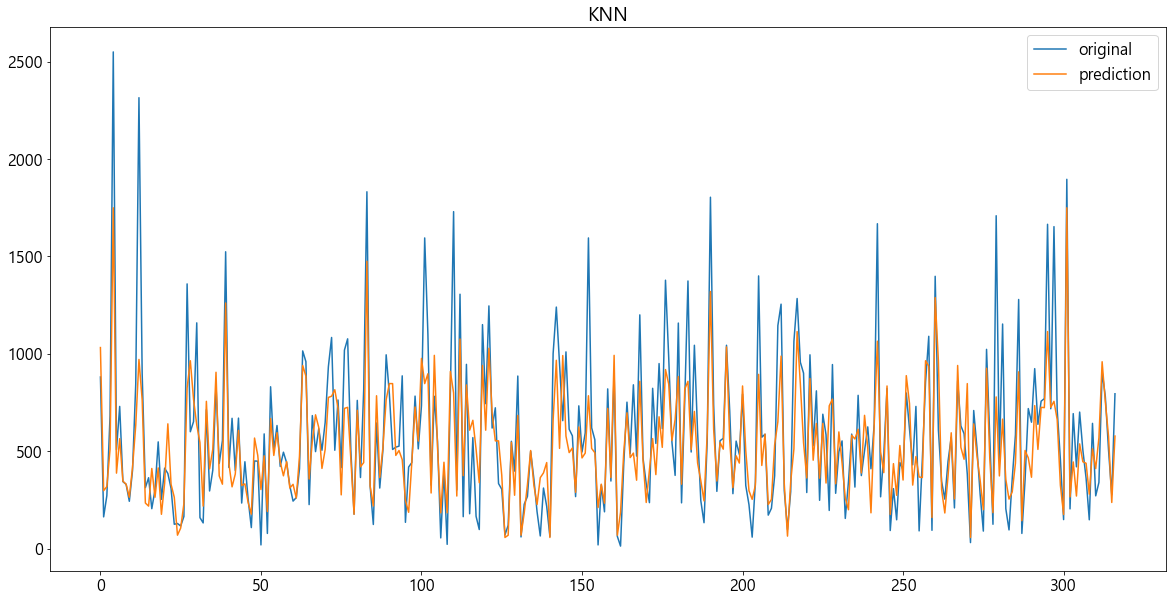

In [33]:
plt.plot(y, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('KNN')
plt.show()

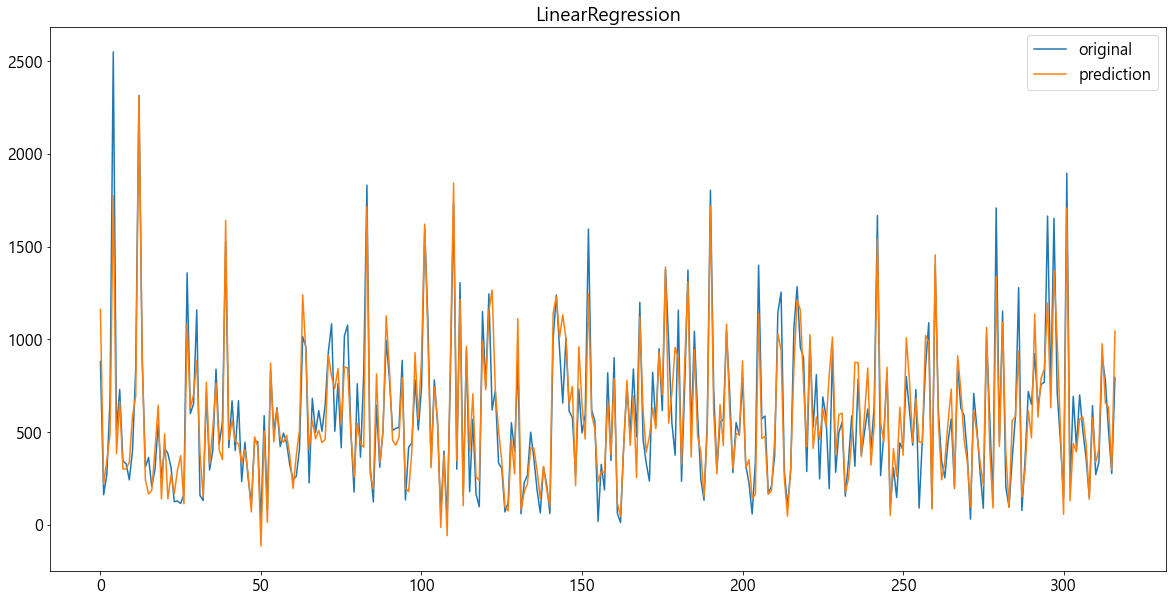

In [34]:
plt.plot(y, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('LinearRegression')
plt.show()

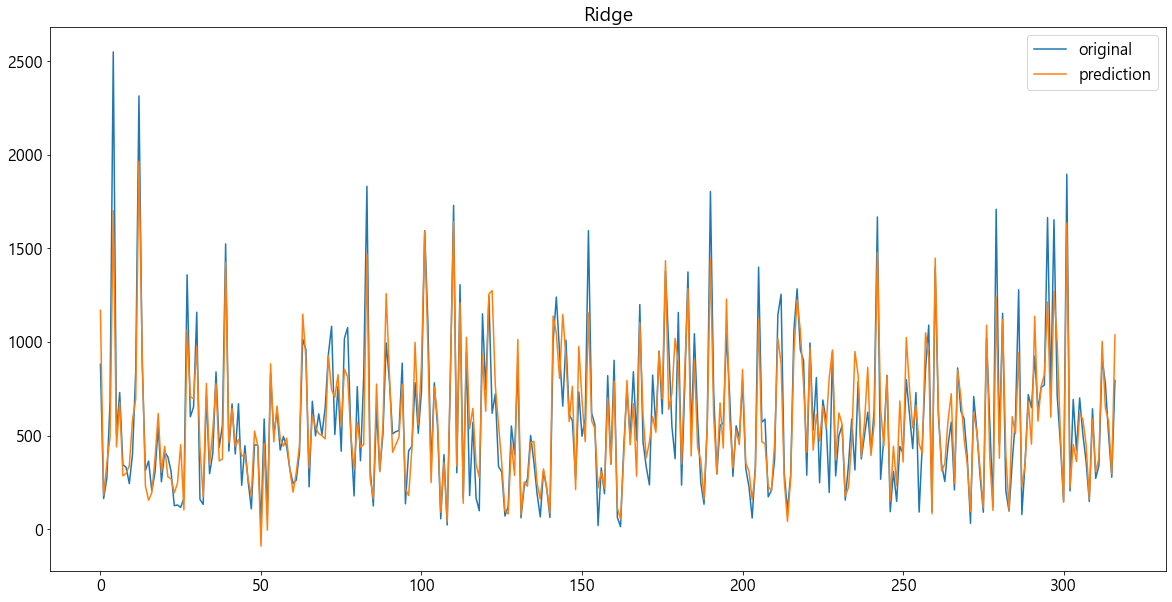

In [35]:
plt.plot(y, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('Ridge')
plt.show()

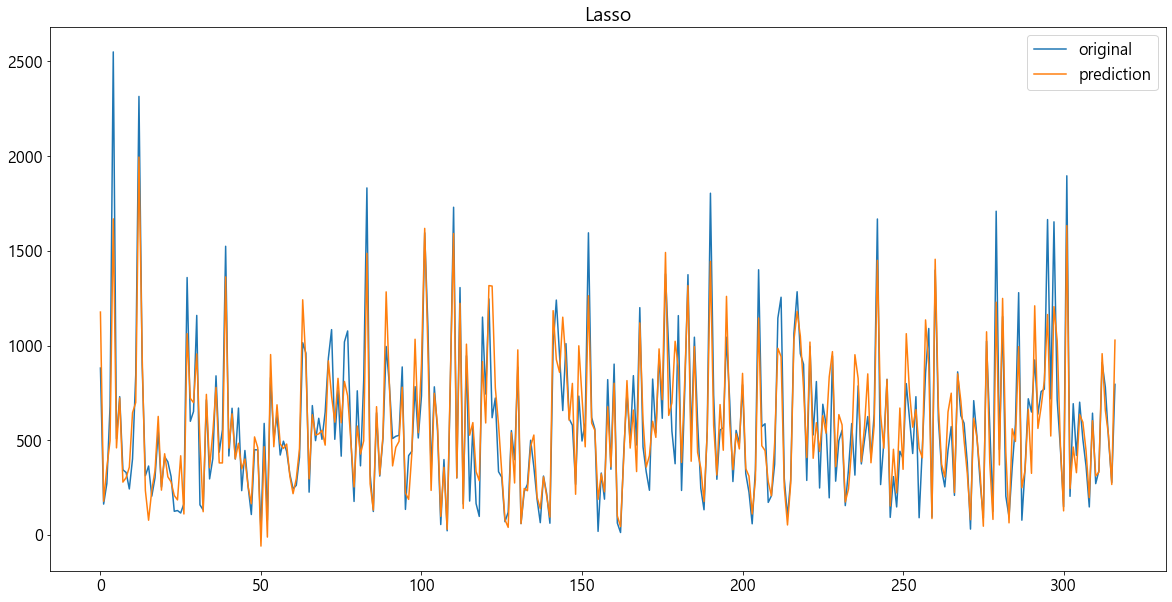

In [36]:
plt.plot(y, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('Lasso')
plt.show()

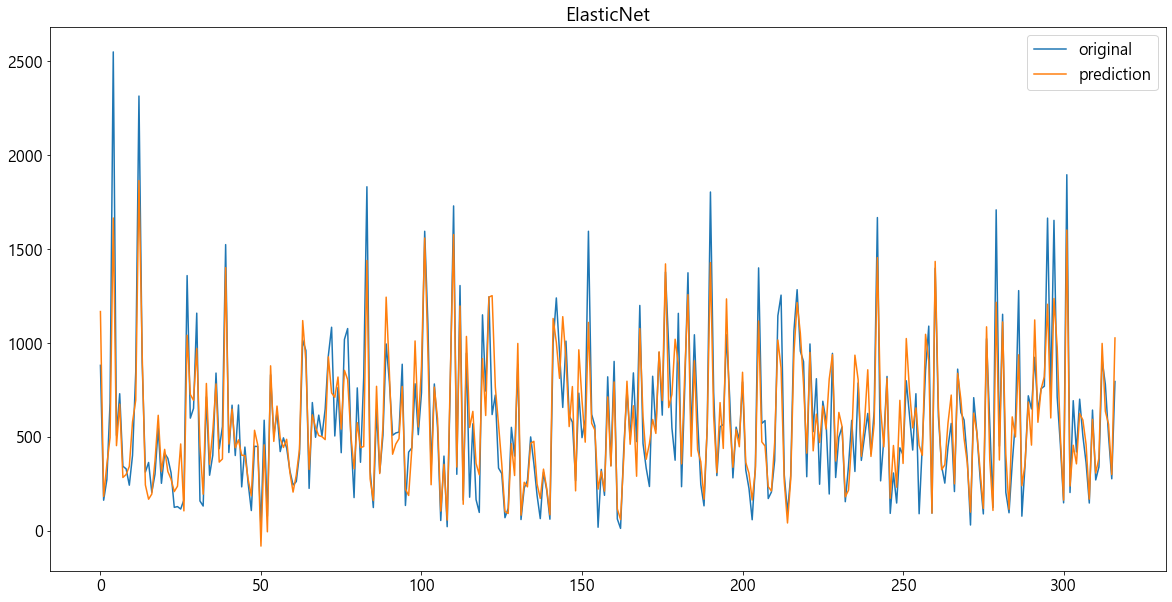

In [37]:
plt.plot(y, label='original')
plt.plot(y_pred5, label='prediction')
plt.legend()
plt.title('ElasticNet')
plt.show()

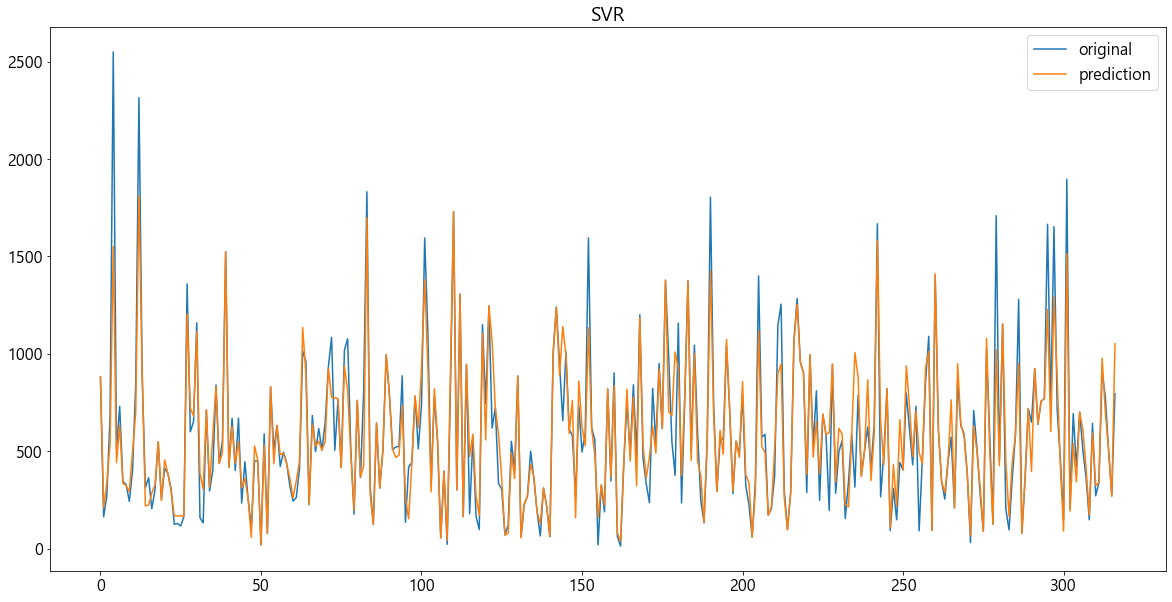

In [38]:
plt.plot(y, label='original')
plt.plot(y_pred6, label='prediction')
plt.legend()
plt.title('SVR')
plt.show()

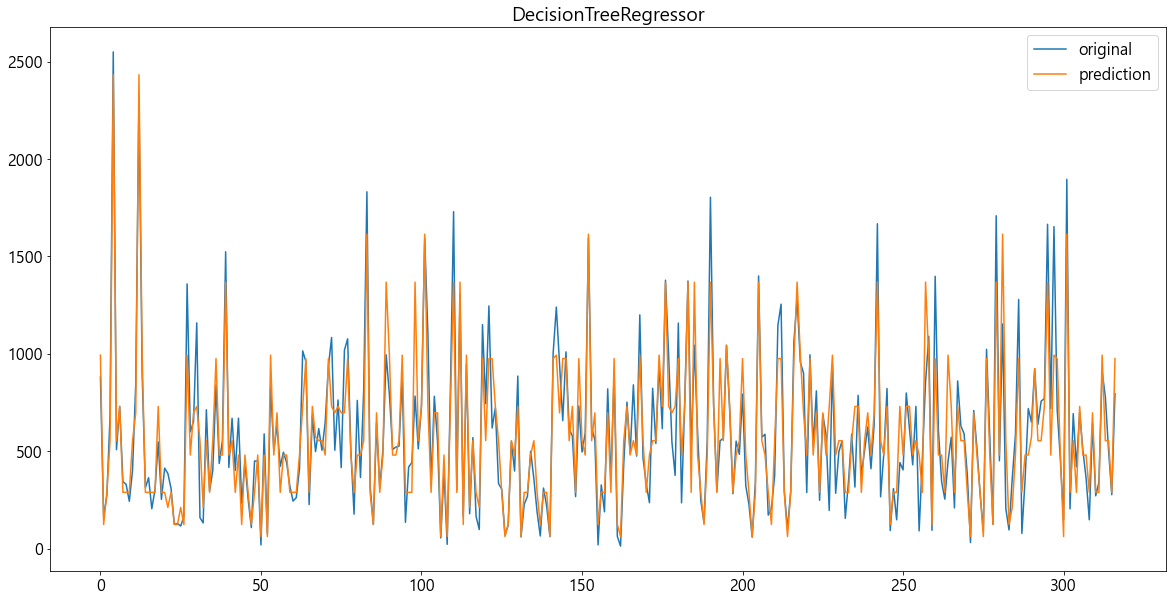

In [39]:
plt.plot(y, label='original')
plt.plot(y_pred7, label='prediction')
plt.legend()
plt.title('DecisionTreeRegressor')
plt.show()

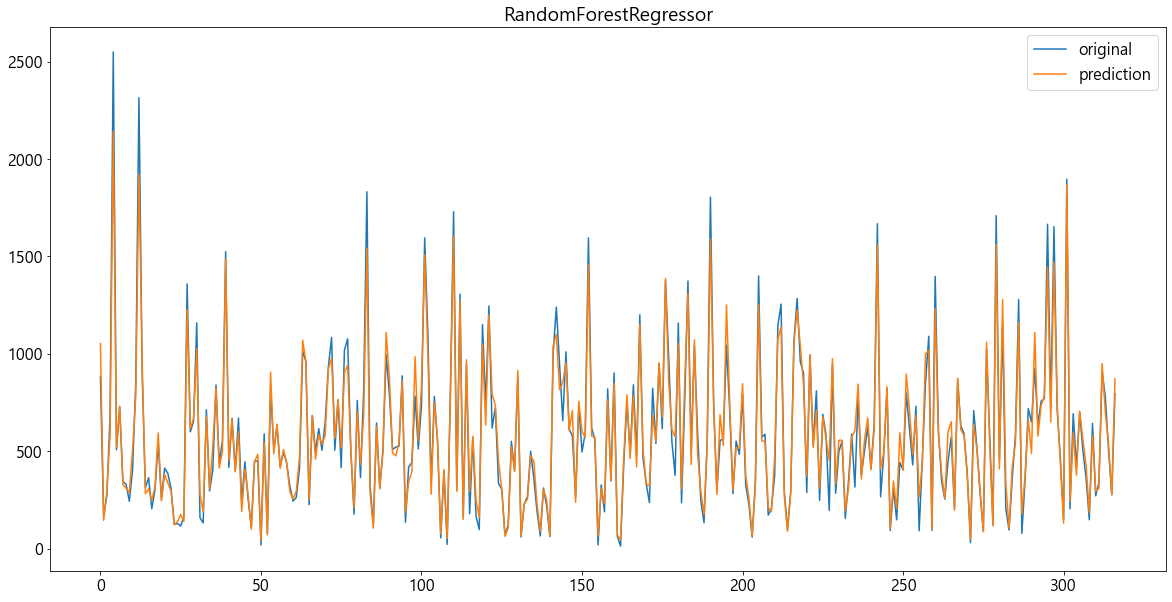

In [40]:
plt.plot(y, label='original')
plt.plot(y_pred8, label='prediction')
plt.legend()
plt.title('RandomForestRegressor')
plt.show()

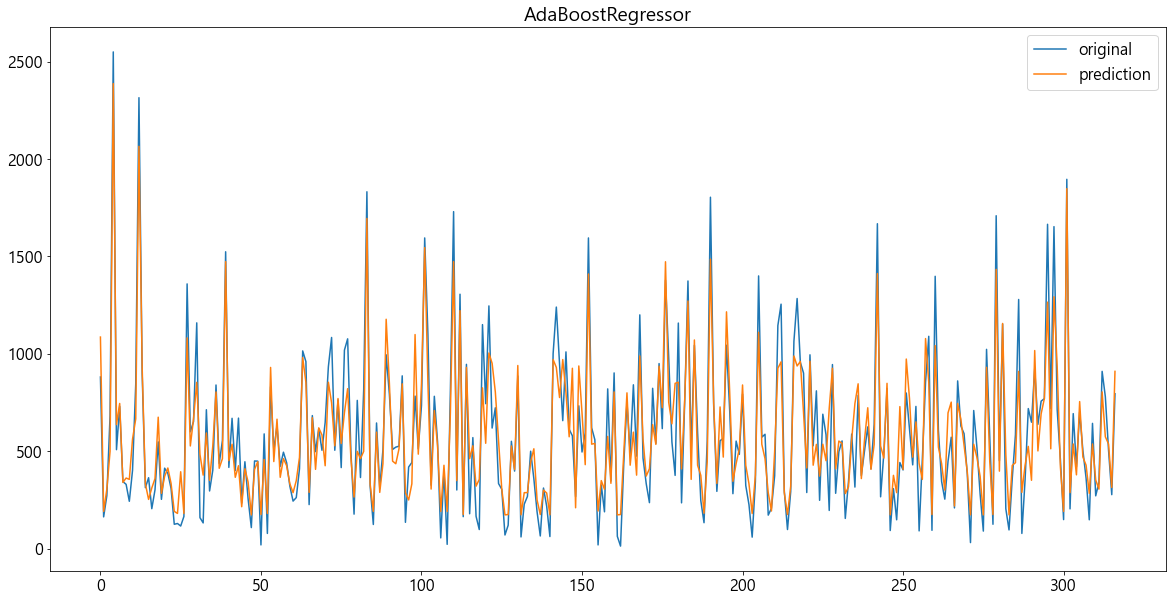

In [41]:
plt.plot(y, label='original')
plt.plot(y_pred9, label='prediction')
plt.legend()
plt.title('AdaBoostRegressor')
plt.show()

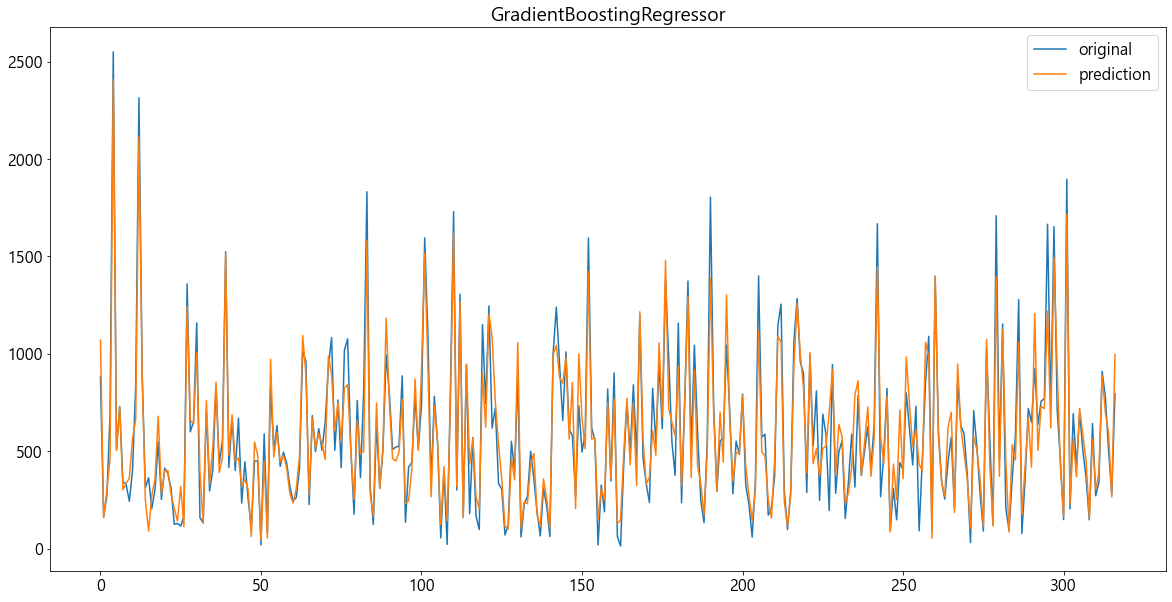

In [42]:
plt.plot(y, label='original')
plt.plot(y_pred10, label='prediction')
plt.legend()
plt.title('GradientBoostingRegressor')
plt.show()

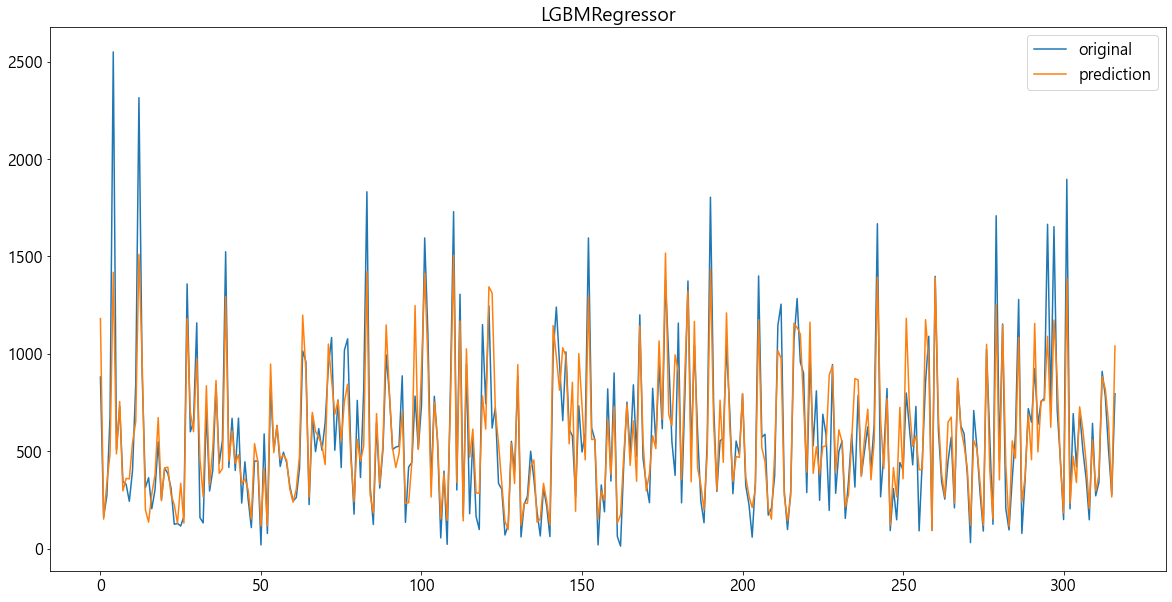

In [43]:
plt.plot(y, label='original')
plt.plot(y_pred11, label='prediction')
plt.legend()
plt.title('LGBMRegressor')
plt.show()

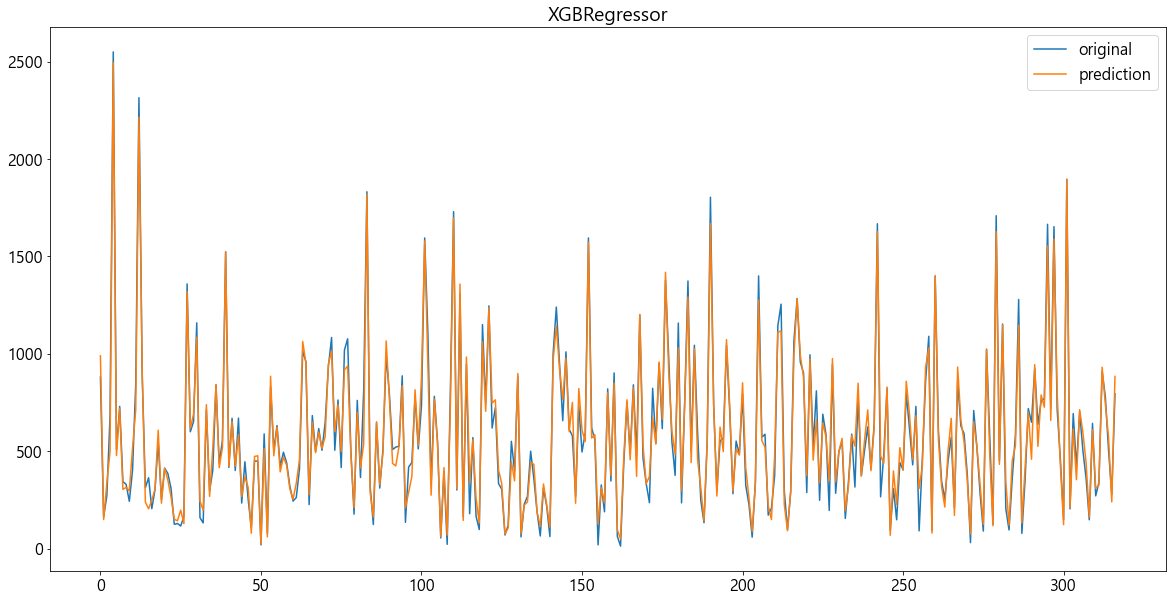

In [44]:
plt.plot(y, label='original')
plt.plot(y_pred12, label='prediction')
plt.legend()
plt.title('XGBRegressor')
plt.show()

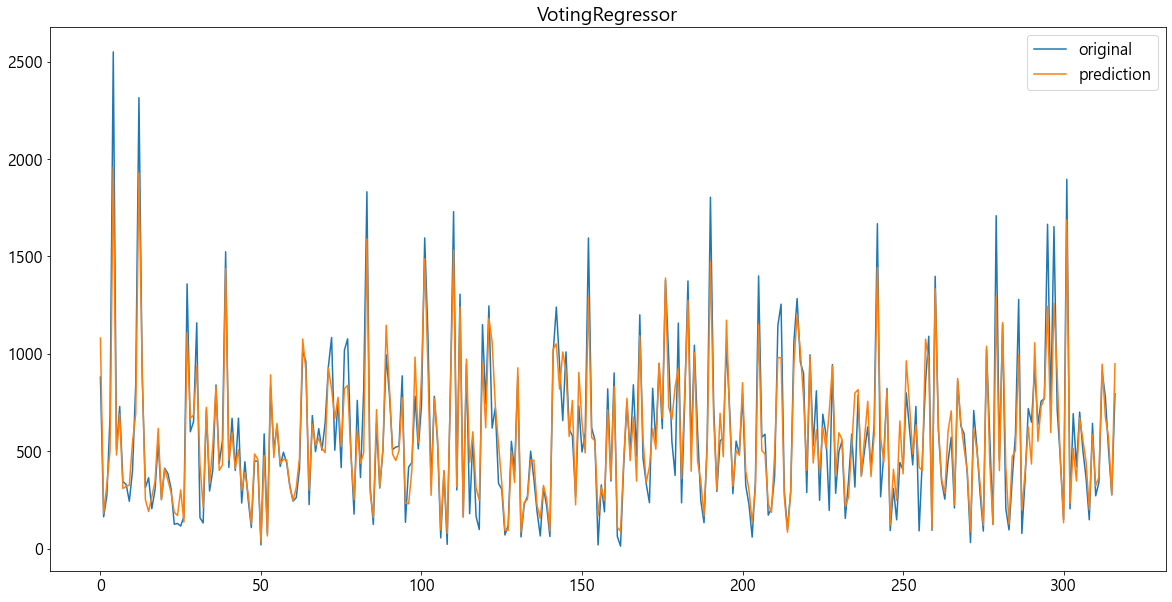

In [45]:
plt.plot(y, label='original')
plt.plot(y_pred13, label='prediction')
plt.legend()
plt.title('VotingRegressor')
plt.show()

In [46]:
best_model13

VotingRegressor(estimators=[('model1', KNeighborsRegressor()),
                            ('model2', LinearRegression()),
                            ('model3', Ridge(alpha=1)),
                            ('model4', Lasso(alpha=1)),
                            ('model5', ElasticNet(alpha=0.01)),
                            ('model6', SVR(C=1000)),
                            ('model7', DecisionTreeRegressor(max_depth=4)),
                            ('model8', RandomForestRegressor(max_depth=9)),
                            ('model9',
                             AdaBoostRegressor(learning_rate=0.1,
                                               n_estimators...
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                           

### 최종평가
- 학습하지 않은 데이터를 통한 평가

In [47]:
# 표준화 작업
scaler1 = MinMaxScaler()
scaler1.fit(x_test)
x_test = scaler1.transform(x_test)
x_test

array([[0.27192631, 0.        , 0.2       , ..., 0.60380261, 0.72653943,
        0.14527995],
       [0.51221466, 0.        , 0.2       , ..., 0.60380261, 0.72653943,
        0.14527995],
       [0.48938726, 0.        , 0.2       , ..., 0.60380261, 0.72653943,
        0.14527995],
       ...,
       [0.33279936, 0.        , 1.        , ..., 0.08102455, 0.68655018,
        0.24051697],
       [0.23988787, 0.        , 1.        , ..., 0.08102455, 0.68655018,
        0.24051697],
       [0.15138166, 0.        , 1.        , ..., 0.08102455, 0.68655018,
        0.24051697]])

In [48]:
# 학습하지 않은 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(x_test)
y_pred2 = best_model2.predict(x_test)
y_pred3 = best_model3.predict(x_test)
y_pred4 = best_model4.predict(x_test)
y_pred5 = best_model5.predict(x_test)
y_pred6 = best_model6.predict(x_test)
y_pred7 = best_model7.predict(x_test)
y_pred8 = best_model8.predict(x_test)
y_pred9 = best_model9.predict(x_test)
y_pred10 = best_model10.predict(x_test)
y_pred11 = best_model11.predict(x_test)
y_pred12 = best_model12.predict(x_test)
y_pred13 = best_model13.predict(x_test)

In [49]:
# 그래프를 그리기 위해 y 값 인덱스를 다시 설정한다.
y_test.reset_index(drop=True, inplace=True)

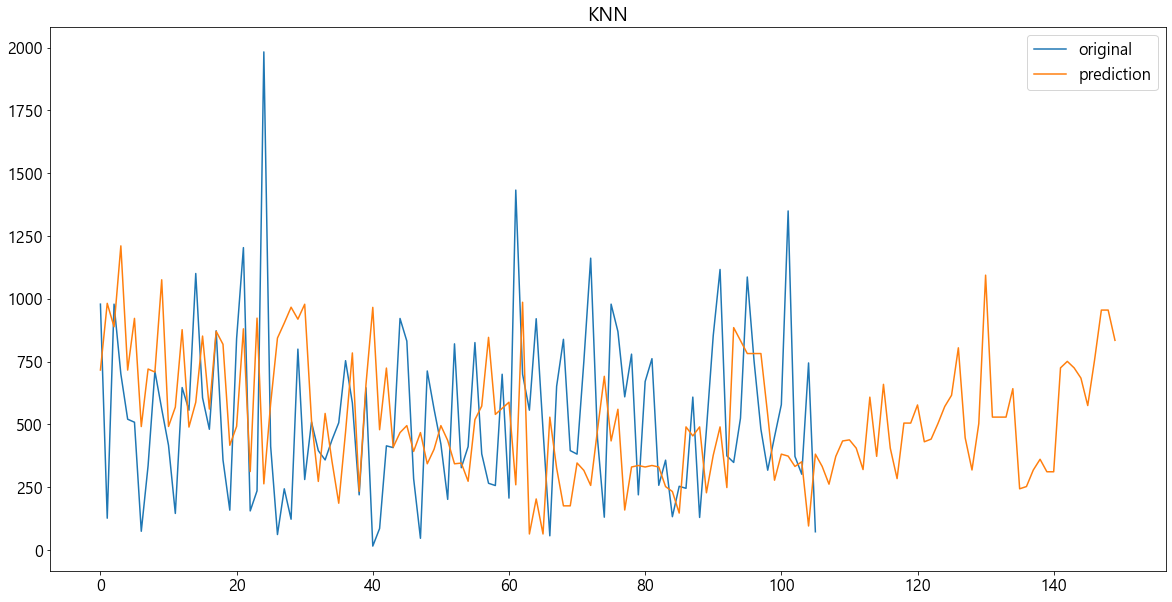

In [50]:
plt.plot(y_test, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('KNN')
plt.show()

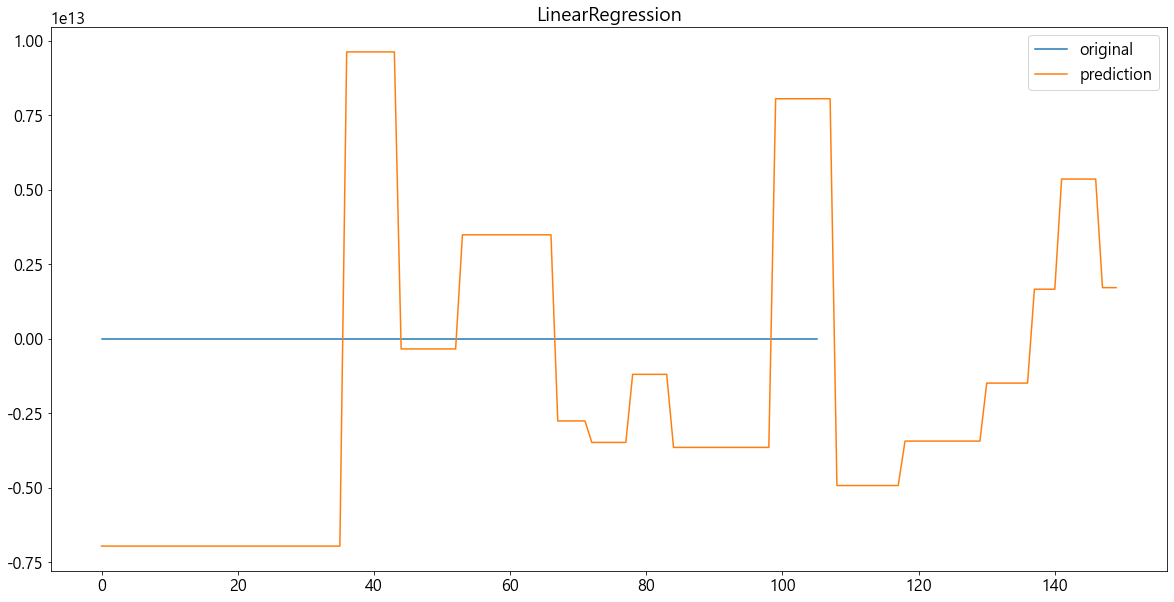

In [51]:
plt.plot(y_test, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('LinearRegression')
plt.show()

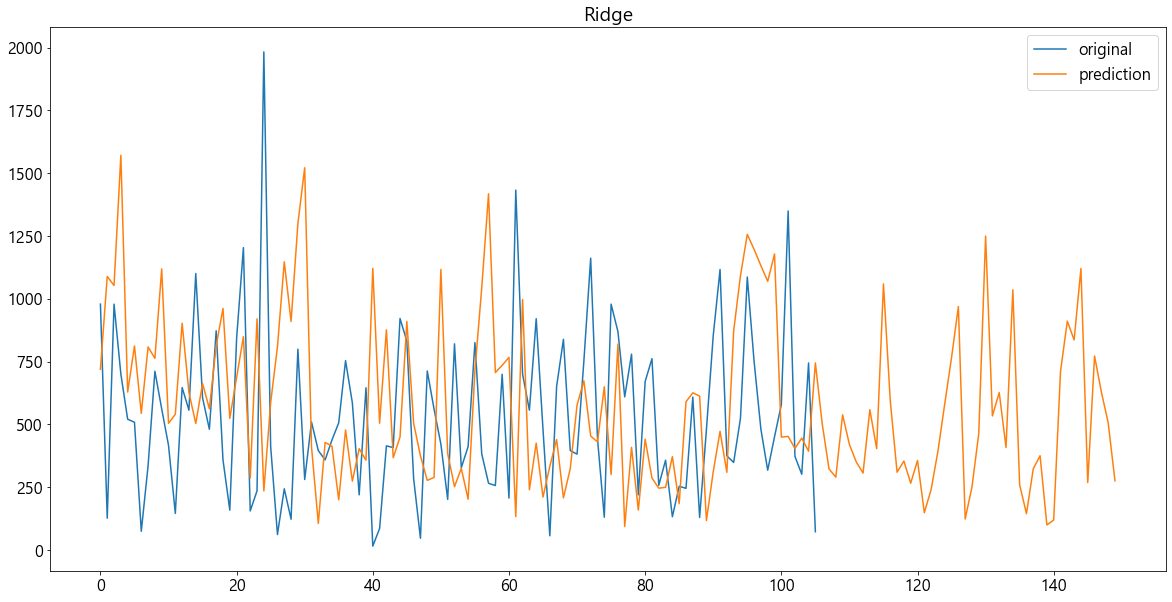

In [52]:
plt.plot(y_test, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('Ridge')
plt.show()

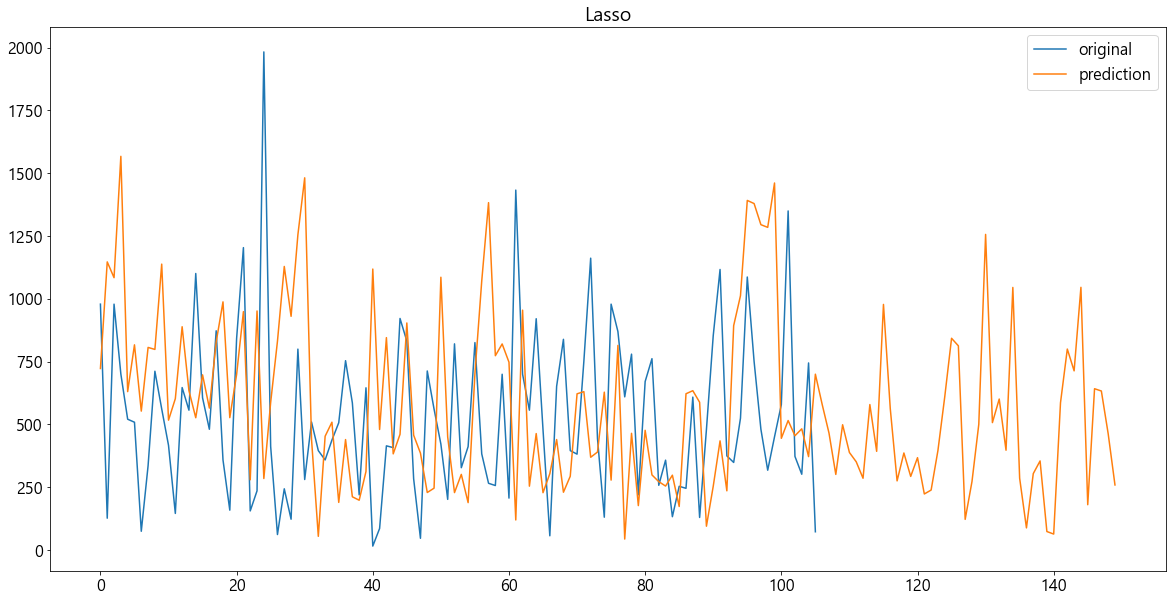

In [53]:
plt.plot(y_test, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('Lasso')
plt.show()

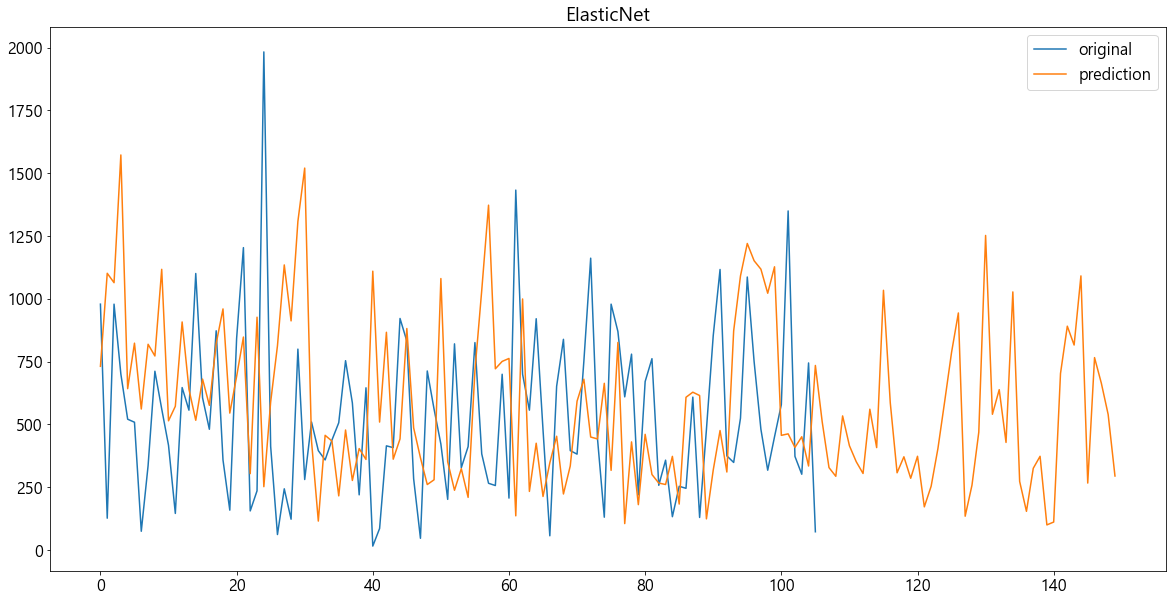

In [54]:
plt.plot(y_test, label='original')
plt.plot(y_pred5, label='prediction')
plt.legend()
plt.title('ElasticNet')
plt.show()

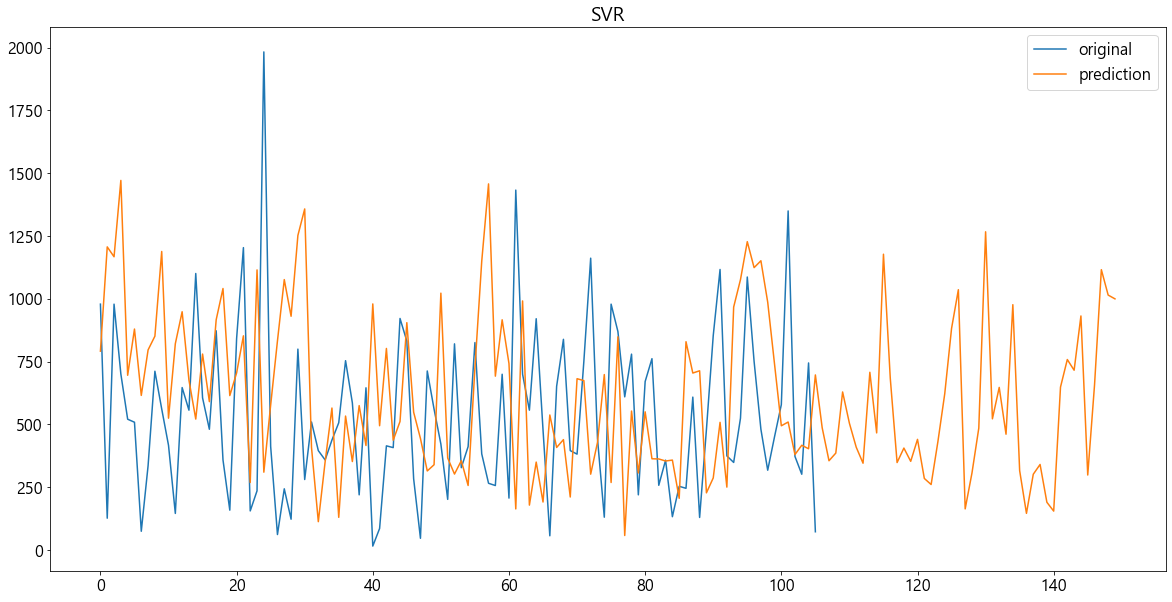

In [55]:
plt.plot(y_test, label='original')
plt.plot(y_pred6, label='prediction')
plt.legend()
plt.title('SVR')
plt.show()

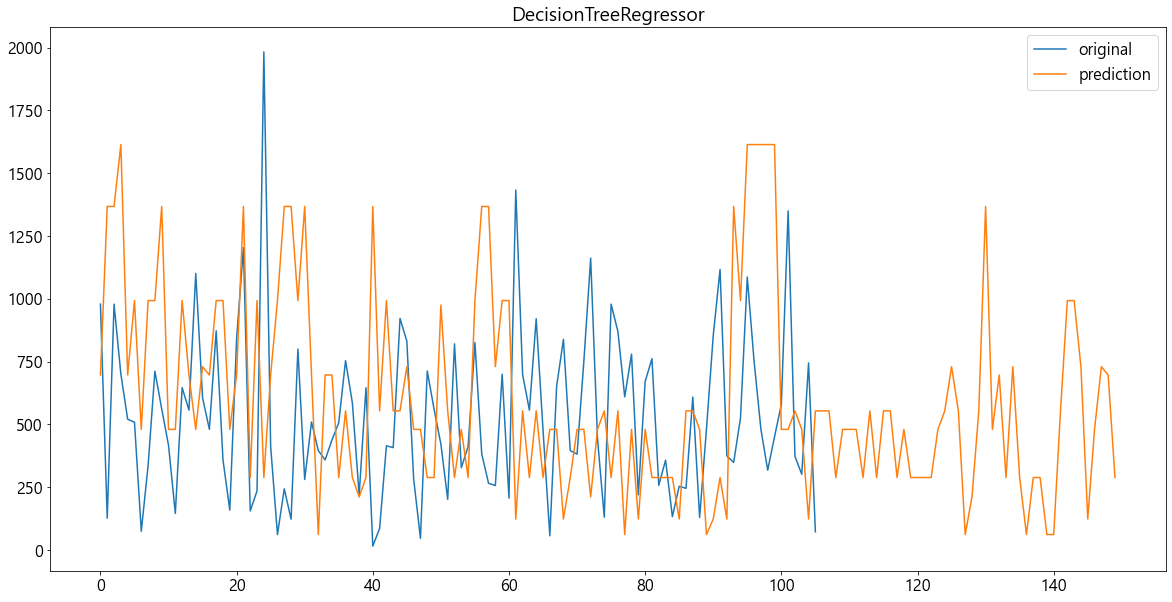

In [56]:
plt.plot(y_test, label='original')
plt.plot(y_pred7, label='prediction')
plt.legend()
plt.title('DecisionTreeRegressor')
plt.show()

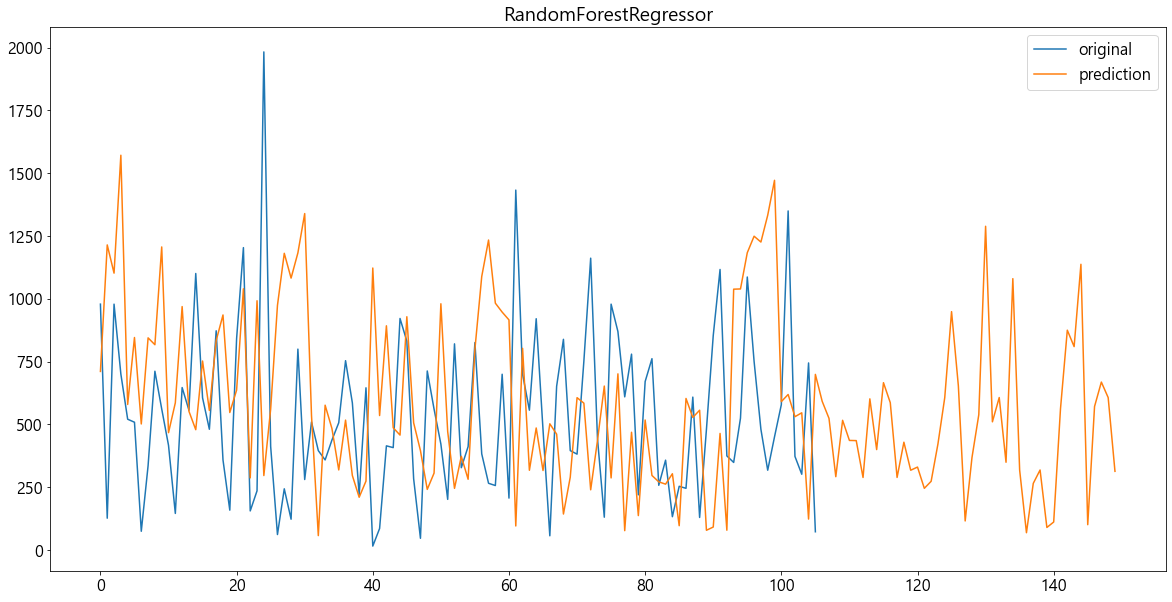

In [57]:
plt.plot(y_test, label='original')
plt.plot(y_pred8, label='prediction')
plt.legend()
plt.title('RandomForestRegressor')
plt.show()

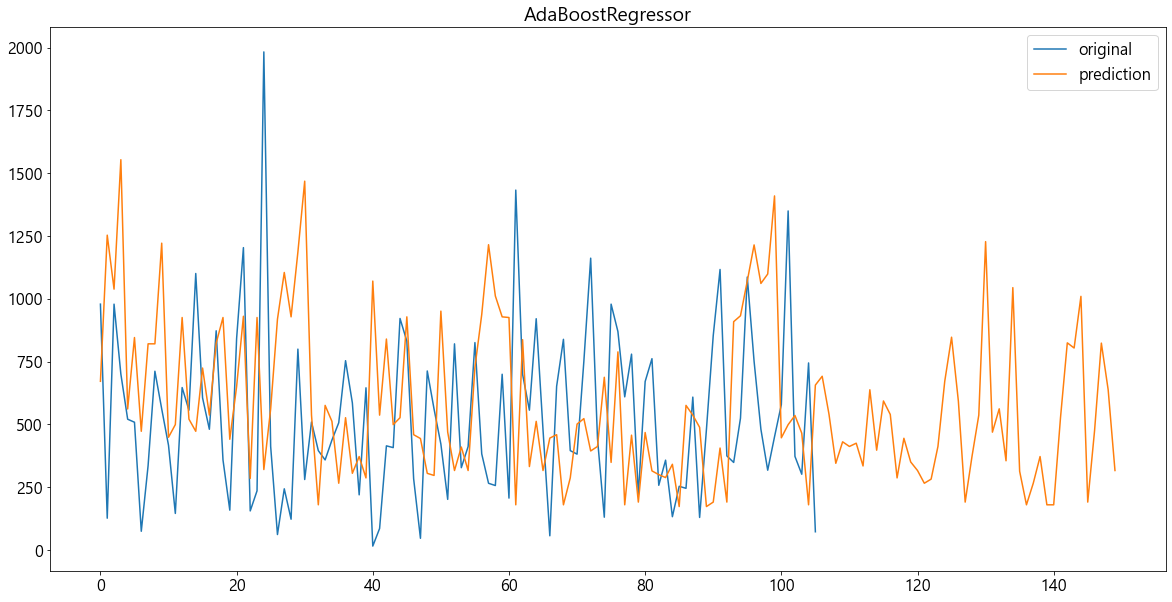

In [58]:
plt.plot(y_test, label='original')
plt.plot(y_pred9, label='prediction')
plt.legend()
plt.title('AdaBoostRegressor')
plt.show()

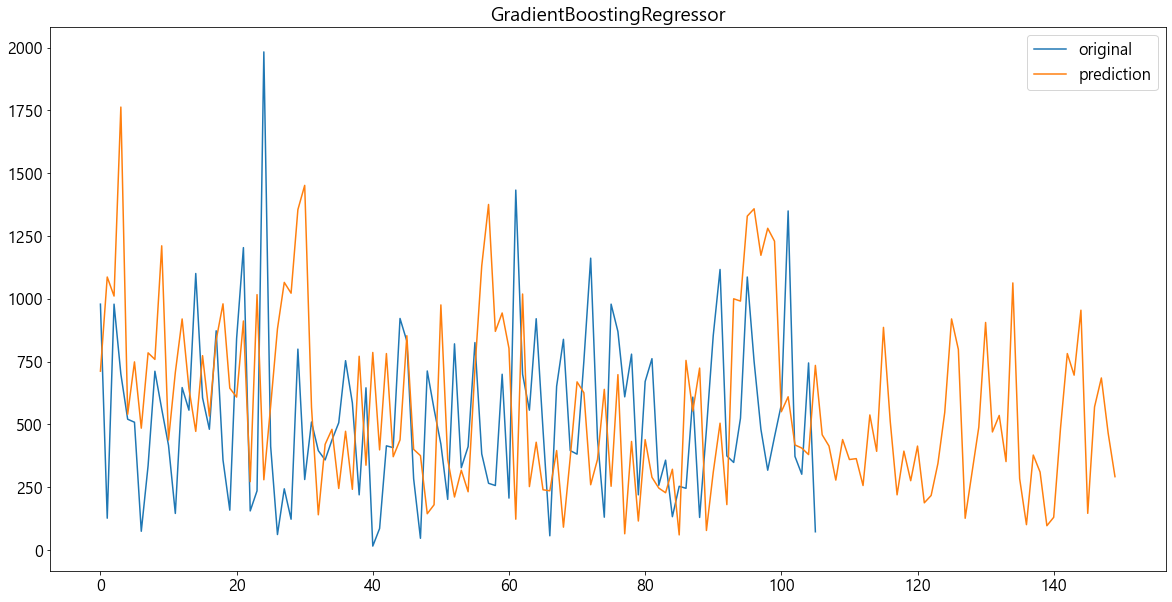

In [59]:
plt.plot(y_test, label='original')
plt.plot(y_pred10, label='prediction')
plt.legend()
plt.title('GradientBoostingRegressor')
plt.show()

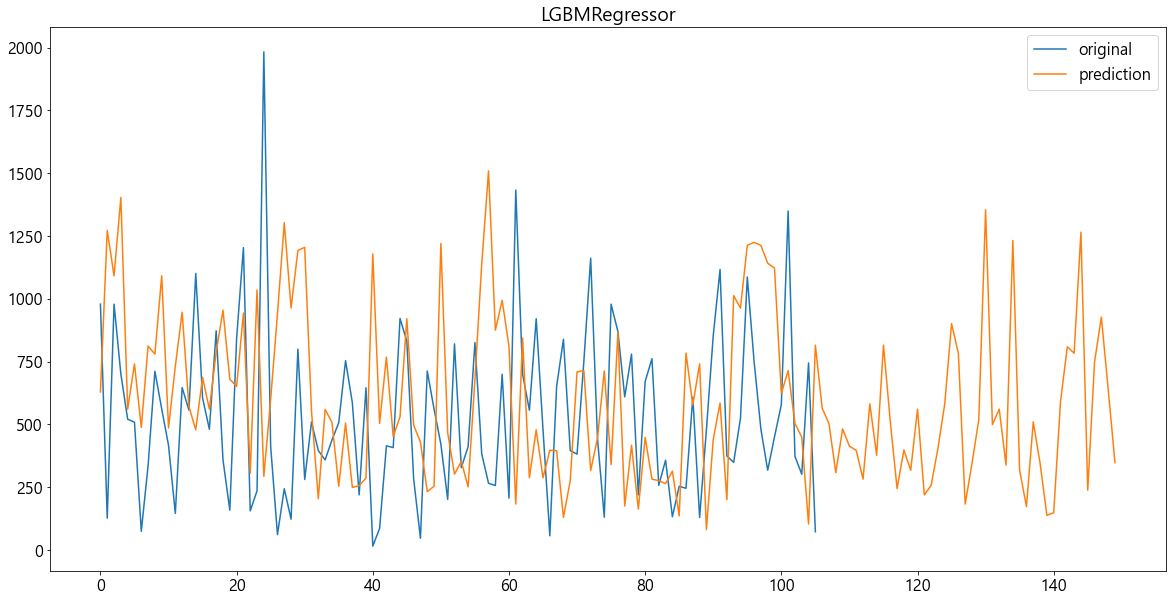

In [60]:
plt.plot(y_test, label='original')
plt.plot(y_pred11, label='prediction')
plt.legend()
plt.title('LGBMRegressor')
plt.show()

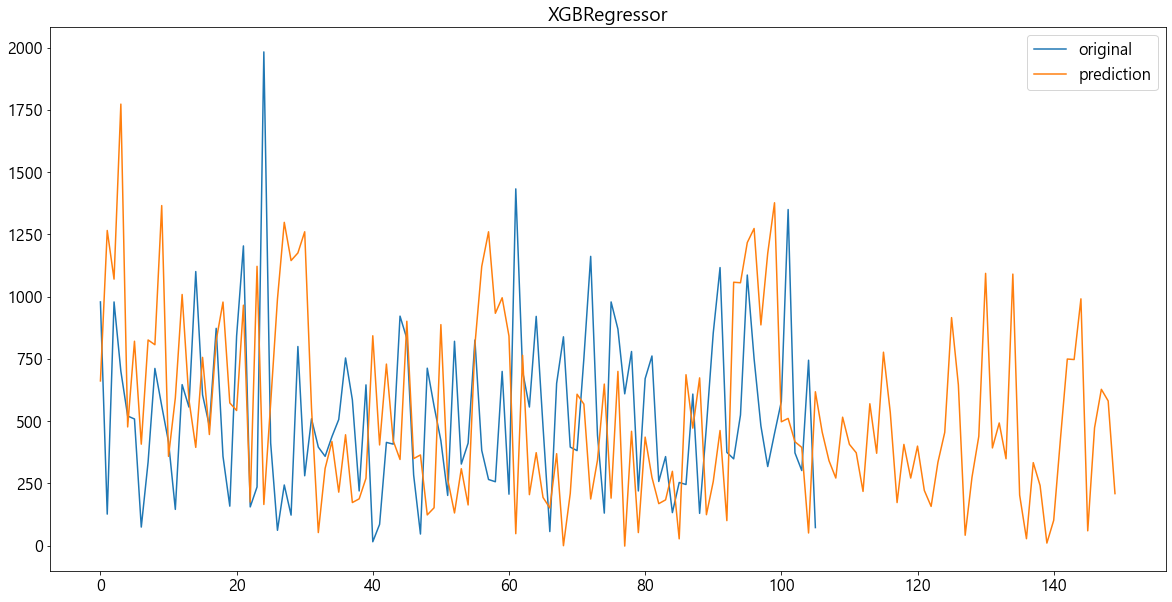

In [61]:
plt.plot(y_test, label='original')
plt.plot(y_pred12, label='prediction')
plt.legend()
plt.title('XGBRegressor')
plt.show()

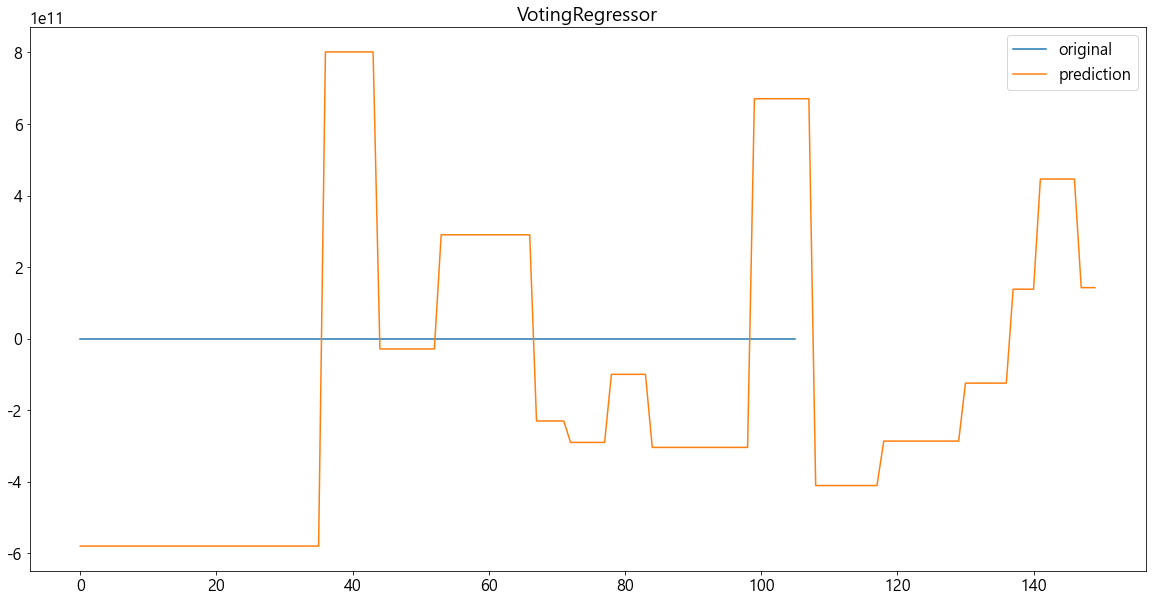

In [62]:
plt.plot(y_test, label='original')
plt.plot(y_pred13, label='prediction')
plt.legend()
plt.title('VotingRegressor')
plt.show()

In [63]:
# # 최적의 하이퍼파라미터가 셋팅된 모델을 받아온다.
# best_model = grid_clf.best_estimator_

# # 학습
# best_model.fit(X, y)

In [64]:
# model1.fit(x_train, y_train)### 모델 하이퍼 파라미터 튜닝

## 추론 및 제출

In [74]:
pred = best_model3.predict(x_test)

In [75]:
# x_test['예측'] = pred

In [76]:
submission['num'] = pred

In [77]:
submission['num']

0       720.075637
1      1089.153165
2      1053.260884
3      1571.433967
4       629.094328
          ...     
145     268.888538
146     772.615645
147     629.630737
148     507.547502
149     275.876543
Name: num, Length: 150, dtype: float64

In [78]:
submission.to_csv('ridge_r2_test1_0.7519.csv', index=False)